In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import time

from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats 

import folium
import folium.plugins as plugins

In [70]:
business=pd.read_csv('/Users/hillarymahoney/Downloads/yelp_business.csv')
business_attributes=pd.read_csv('/Users/hillarymahoney/Downloads/yelp_business_attributes.csv')
business_hours=pd.read_csv('/Users/hillarymahoney/Downloads/yelp_business_hours.csv')
reviews=pd.read_csv('/Users/hillarymahoney/Downloads/yelp_review.csv')

In [65]:
demographics=pd.read_csv('/Users/hillarymahoney/Downloads/Census.csv')

In [60]:
phx_list=['Phoenix','Pheonix AZ','Phoeniix','Phoenix AZ','Phoenix metro area','Phoenix Valley','Phoenix,','Phoenix, AZ','Phoneix','Phoniex','Phx']

In [69]:
phx_demographics=demographics[demographics.primary_City.isin(phx_list)]
phx_demographics.shape

(45, 122)

In [63]:
phx_business = business[business.city.isin(phx_list)]
#phx_business=business.loc[business['city']=='Phoenix']
phx_business.shape

(17224, 13)

In [100]:
#filter for restaurants
#list of key words: Restuarants, Food, Restaurant
phx_businesses=phx_business[phx_business['categories'].str.contains('Restaurants') | 
                            phx_business['categories'].str.contains('Restaurant')]
phx_businesses.shape

(3655, 13)

In [7]:
#drop irrelevant columns
bus_atts=business_attributes.drop(['AcceptsInsurance','HairSpecializesIn_coloring','HairSpecializesIn_africanamerican','HairSpecializesIn_curly','HairSpecializesIn_perms','HairSpecializesIn_kids','HairSpecializesIn_extensions','HairSpecializesIn_asian','HairSpecializesIn_straightperms'],axis=1)


In [101]:
dfs = [phx_businesses, bus_atts, business_hours, reviews] # list of dataframes

df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['business_id'],
                                            how='left'), dfs)
print(df_merged.shape)
df_merged.head()
# if you want to fill the values that don't exist in the lines of merged dataframe simply fill with required strings as

#df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['business_id'],
#                                            how='left'), data_frames).fillna('void')

(331499, 100)


,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars_x,...,saturday,sunday,review_id,user_id,stars_y,date,text,useful,funny,cool
0,rDMptJYWtnMhpQu_rRXHng,"""McDonald's""",NaN,"""719 E Thunderbird Rd""",Phoenix,AZ,85022,33.60707,-112.064382,1.0,...,None,None,bABGON0ehmb7MBJrI02l7Q,Ck73f1qtZbu68F_vjzsBrQ,1,2016-02-25,The speed of delivery of my food order was ter...,3,0,0
1,rDMptJYWtnMhpQu_rRXHng,"""McDonald's""",NaN,"""719 E Thunderbird Rd""",Phoenix,AZ,85022,33.60707,-112.064382,1.0,...,None,None,zn7bEYAVzwWSJdSd2a4zoQ,u0JoB0Vm1ZhwF8nysxPnfg,2,2011-06-06,"McDonald's is McDonald's. My ""beef"" with this ...",6,7,4
2,rDMptJYWtnMhpQu_rRXHng,"""McDonald's""",NaN,"""719 E Thunderbird Rd""",Phoenix,AZ,85022,33.60707,-112.064382,1.0,...,None,None,ONnRwv_KOLRyKyk72SzTHg,F95NFEFwuwA__SIRt9IJNA,1,2015-11-05,I stopped by for a double quarter pounder with...,2,0,0
3,rDMptJYWtnMhpQu_rRXHng,"""McDonald's""",NaN,"""719 E Thunderbird Rd""",Phoenix,AZ,85022,33.60707,-112.064382,1.0,...,None,None,wlcWp7STNY0Ccnpap2_Nzw,uHZxYHgjxhXY7PS6g2rFsA,1,2012-06-17,Was there Friday morning around 9am- rudest yo...,1,0,0
4,rDMptJYWtnMhpQu_rRXHng,"""McDonald's""",NaN,"""719 E Thunderbird Rd""",Phoenix,AZ,85022,33.60707,-112.064382,1.0,...,None,None,0BsbVLK2dLyT55Nw-omXRA,Akt0llUBaVa1Qxi8Ogdv4Q,1,2011-08-12,went back there today and asked for two simple...,0,0,0


In [78]:
for col in df_merged.columns:
    print(col)

business_id
name
neighborhood
address
city
state
postal_code
latitude
longitude
stars_x
review_count
is_open
categories
ByAppointmentOnly
BusinessAcceptsCreditCards
BusinessParking_garage
BusinessParking_street
BusinessParking_validated
BusinessParking_lot
BusinessParking_valet
RestaurantsPriceRange2
GoodForKids
WheelchairAccessible
BikeParking
Alcohol
HasTV
NoiseLevel
RestaurantsAttire
Music_dj
Music_background_music
Music_no_music
Music_karaoke
Music_live
Music_video
Music_jukebox
Ambience_romantic
Ambience_intimate
Ambience_classy
Ambience_hipster
Ambience_divey
Ambience_touristy
Ambience_trendy
Ambience_upscale
Ambience_casual
RestaurantsGoodForGroups
Caters
WiFi
RestaurantsReservations
RestaurantsTakeOut
HappyHour
GoodForDancing
RestaurantsTableService
OutdoorSeating
RestaurantsDelivery
BestNights_monday
BestNights_tuesday
BestNights_friday
BestNights_wednesday
BestNights_thursday
BestNights_sunday
BestNights_saturday
GoodForMeal_dessert
GoodForMeal_latenight
GoodForMeal_lunch
Goo

In [11]:
# check missing data
df_merged.isnull().sum()

business_id                            0
name                                   0
neighborhood                       17213
address                                0
city                                   0
state                                  0
postal_code                           92
latitude                               0
longitude                              0
stars                                  0
review_count                           0
is_open                                0
categories                             0
ByAppointmentOnly                   2636
BusinessAcceptsCreditCards          2636
BusinessParking_garage              2636
BusinessParking_street              2636
BusinessParking_validated           2636
BusinessParking_lot                 2636
BusinessParking_valet               2636
RestaurantsPriceRange2              2636
GoodForKids                         2636
WheelchairAccessible                2636
BikeParking                         2636
Alcohol         

In [89]:
#how many businesses are open?
df_merged['is_open'].value_counts()

1    510115
0     66682
Name: is_open, dtype: int64

## Explore Zip Codes

Text(0.5,1,'Top 50 Zip Codes by businesses listed')

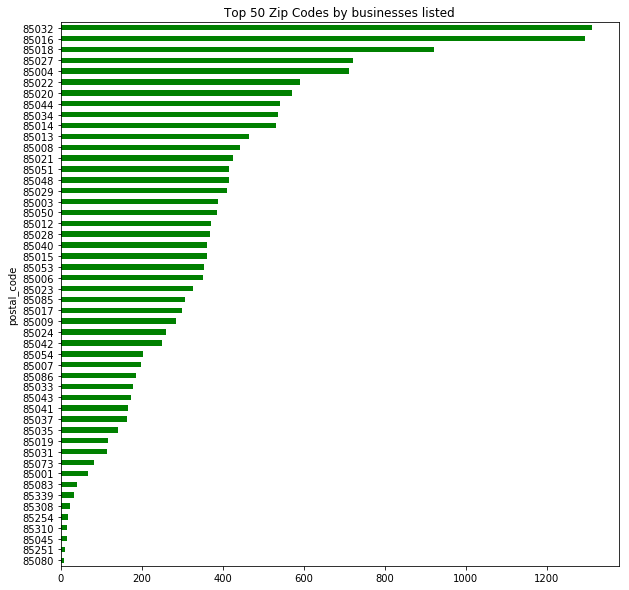

In [61]:
zipCode_business_counts = df_merged[['postal_code', 'business_id']].groupby(['postal_code'])\
['business_id'].agg('count').sort_values(ascending=False)

zipCode_business_counts.rename(columns={'business_id' : 'number_of_businesses'}, inplace=True)

zipCode_business_counts[0:50].sort_values(ascending=True)\
.plot(kind='barh', stacked=False, figsize=[10,10], color='green')
plt.title('Top 50 Zip Codes by businesses listed')

Text(0.5,1,'Top 50 Zip Codes by reviews')

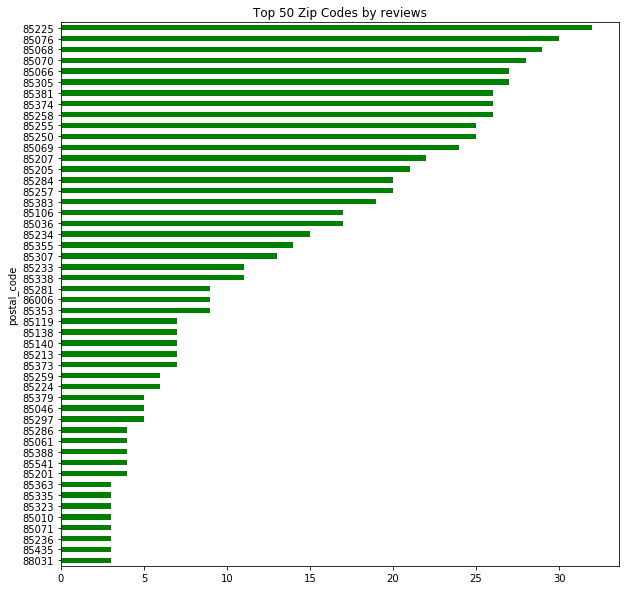

In [60]:
# look at ratings and reviews per zip code
zipCode_business_reviews = df_merged[['postal_code', 'review_count', 'stars']].groupby(['postal_code'])\
.agg({'review_count': 'sum', 'stars': 'mean', 'stars':'median'}).sort_values(by='review_count', ascending=True)


zipCode_business_reviews['review_count'][0:50].plot(kind='barh', stacked=False, figsize=[10,10],color='green')
plt.title('Top 50 Zip Codes by reviews')


Text(0.5,1,'Zip Codes with greater than 5 reviews ranked by average stars')

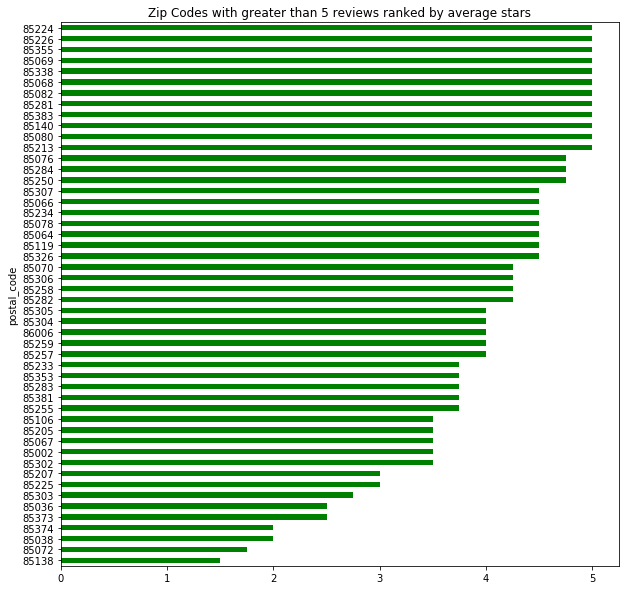

In [59]:
zipCode_business_reviews[zipCode_business_reviews.review_count > 5]['stars'][0:50].sort_values()\
.plot(kind='barh', stacked=False, figsize=[10,10],color='green')

plt.title('Zip Codes with greater than 5 reviews ranked by average stars')

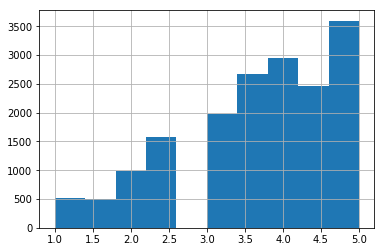

In [20]:
df_merged['stars'].hist()


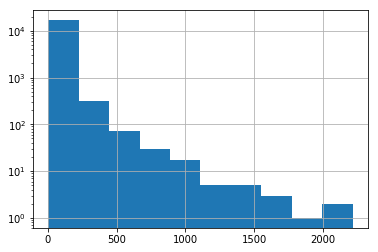

In [23]:
#df_merged['review_count'].hist()

#try transformation like log or logit
df_merged['review_count'].hist().set_yscale('log')


In [24]:
#add a column to the data set
df_merged['log_reviews']=np.log(df_merged['review_count']+0.1)

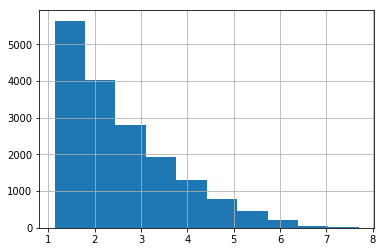

In [25]:
df_merged['log_reviews'].hist()

In [38]:
#geographically plot businesses and ratings
ratings=df_merged[['stars','review_count','latitude','longitude']]
#normalize data or create some sort of metric??
ratings['stars_per_100_reviews']=ratings['stars']*ratings['review_count']/100
ratings['popularity']=ratings['stars']*ratings['review_count']

ratings

/Users/hillarymahoney/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/hillarymahoney/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,stars,review_count,latitude,longitude,stars_per_100_reviews,popularity
0,1.5,18,33.524903,-112.115310,0.270,27.0
1,1.5,46,33.435463,-112.006989,0.690,69.0
2,4.0,5,33.600877,-112.037685,0.200,20.0
3,5.0,5,33.803900,-112.130405,0.250,25.0
4,1.0,10,33.607070,-112.064382,0.100,10.0
5,3.0,232,33.607310,-112.063404,6.960,696.0
6,2.0,18,33.506368,-112.033568,0.360,36.0
7,3.0,34,33.508765,-112.046240,1.020,102.0
8,2.5,21,33.656906,-111.929890,0.525,52.5
9,5.0,4,33.449967,-112.070223,0.200,20.0


One of the reasons that it's easy to get confused between scaling and normalization is because the terms are sometimes used interchangeably and, to make it even more confusing, they are very similar! In both cases, you're transforming the values of numeric variables so that the transformed data points have specific helpful properties. The difference is that, in scaling, you're changing the range of your data while in normalization you're changing the shape of the distribution of your data.

This means that you're transforming your data so that it fits within a specific scale, like 0-100 or 0-1. You want to scale data when you're using methods based on measures of how far apart data points, like support vector machines, or SVM or k-nearest neighbors, or KNN. With these algorithms, a change of "1" in any numeric feature is given the same importance.

Scaling just changes the range of your data. Normalization is a more radical transformation. The point of normalization is to change your observations so that they can be described as a normal distribution.


/Users/hillarymahoney/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


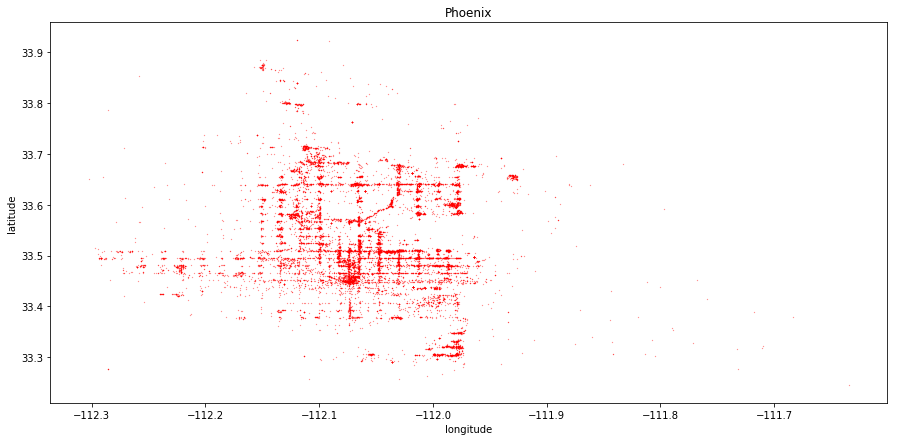

In [49]:
f, ax1=plt.subplots(1,1,figsize=(15,7))

#pick central point in Phoenix
lat = 33.435463
lon = -112.006989

lon_min, lon_max = lon-0.3, lon+0.5
lat_min, lat_max = lat-0.4, lat+0.5

ratings_phx=ratings[(ratings["longitude"]>lon_min) & (ratings["longitude"]<lon_max) & (ratings["latitude"]>lat_min) & (ratings["latitude"]<lat_max)]

ratings_phx.plot(kind='scatter',x='longitude',y='latitude', color='red',s=0.05, alpha=0.8, subplots=True, ax=ax1)
ax1.set_title("Phoenix")
f.show()

In [51]:
#rearrange data to use folium for mapping
df=[]
list_stars=list(ratings['stars'].unique())

for star in list_stars:
    subset=ratings_phx[ratings_phx['stars']==star]
    df.append(subset[['latitude','longitude']].values.tolist())

In [57]:
#use central points from scatter plot above
zoom_start=11
print("Phoenix Heat Map of Businesses")
m=folium.Map(location=[lat,lon],tiles="OpenStreetMap",zoom_start=zoom_start)

heat_map=plugins.HeatMapWithTime(df, max_opacity=0.4, auto_play=True, display_index=True, radius=7)
heat_map.add_to(m)
m

Phoenix Heat Map of Businesses
